### Import Necessary Module and Set Path 

In [44]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()
from IPython.display import Image
import matplotlib.pyplot as plt
import os

In [45]:
import analysis as an

In [61]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('./2035_0_01_growth/output.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [62]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

Sink_Source_Inst has no values
Sink_Source_Inst has no values


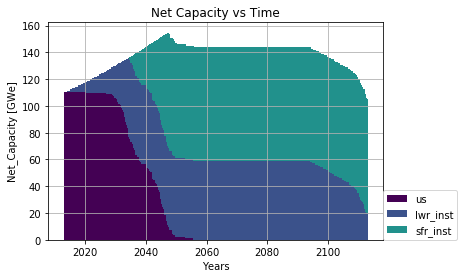

In [63]:
Image('power_plot.png')

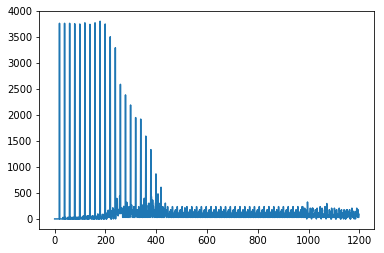

In [64]:
uox = an.get_agent_ids(cur, 'reactor')
influx = an.facility_commodity_flux(cur, uox,
                                         ['uox_waste'],
                                         True, False)
plt.plot(influx['uox_waste'])


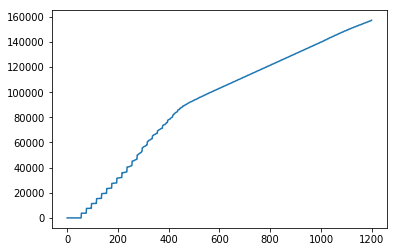

In [65]:

uox_rep = an.get_prototype_id(cur, 'reprocessing')
influx = an.facility_commodity_flux(cur, uox_rep,
                                         ['cooled_uox', 'pre_2013_unf'],
                                         False, True)
total = [x+y for x,y in zip(influx['cooled_uox'], influx['pre_2013_unf'])]
total = influx['cooled_uox']
plt.plot(total)

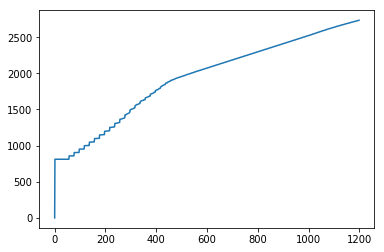

In [66]:
uox_rep = an.get_prototype_id(cur, 'reprocessing')
outflux = an.facility_commodity_flux(cur, uox_rep,
                                         ['lwr_pu'],
                                         True, True)
plt.plot(outflux['lwr_pu'])


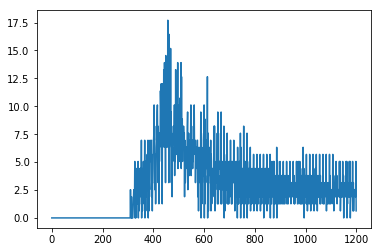

In [67]:
uox_rep = an.get_prototype_id(cur, 'sfr_reprocessing')
outflux = an.facility_commodity_flux(cur, uox_rep,
                                         ['sfr_pu'],
                                         True, False)
plt.plot(outflux['sfr_pu'])


157199.437


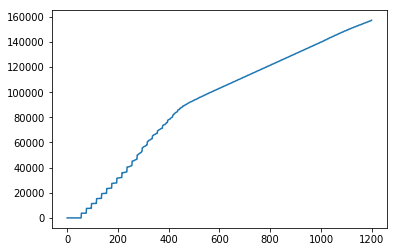

In [76]:
uox_unf = an.get_agent_ids(cur, 'storage')
uox = an.facility_commodity_flux(cur, uox_unf, ['cooled_uox'], True, True)
plt.plot(uox['cooled_uox'])
print(uox['cooled_uox'][-1])

[     0.        0.        0.   ... 405799.68 405936.96 406211.52]


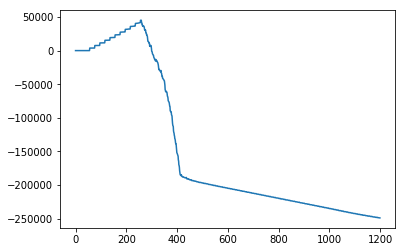

In [77]:
lwr_mixer = an.get_prototype_id(cur, 'sfr_mixer_lwr')
outflux = an.facility_commodity_flux(cur, lwr_mixer,
                                     ['sfr_fuel_legacy'],
                                     True, True)
outflux = np.array(outflux['sfr_fuel_legacy'])
unf_for_sfr_fuel = 1 * 0.0869 / (0.01)
influx = an.facility_commodity_flux(cur, lwr_mixer, ['lwr_pu'], False, True)
unf_needed = outflux * unf_for_sfr_fuel
print(unf_needed)
plt.plot(np.array(uox['cooled_uox']) - unf_needed)

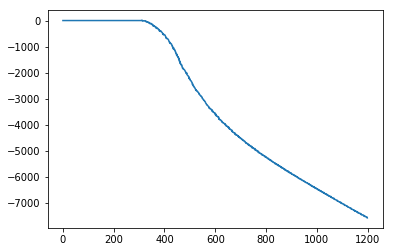

In [70]:
sfr_mixer = an.get_prototype_id(cur, 'sfr_mixer_sfr')
outflux = an.facility_commodity_flux(cur, sfr_mixer,
                                     ['sfr_fuel_new'],
                                     True, True)
outflux = np.array(outflux['sfr_fuel_new'])
influx = an.facility_commodity_flux(cur, sfr_mixer, ['sfr_pu'], False, True)
influx = np.array(influx['sfr_pu']) / 0.22
plt.plot(influx - outflux)